

# Project: medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

I choose this dadte base becouse easy to understand and must cleanet database 
some Q :
 Q1: message affects the Patient if come or not?
 Q2: number of male and female in Scholarship?
 Q3: how many Female ara compared to male ?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# read file 
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape
#returns a tuple of the dimensions of the dataframe 
#110527 Row and 14 Columns

(110527, 14)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
df.info()
# check if there is  missing value 
# No missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# check for duplicates in the data
sum(df.duplicated())

0

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
sum(df.duplicated())

0

In [8]:
df.describe()
# -1 in age not accept 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# function for get mean. 

def mean(m):
    return m.mean()

In [10]:
# print mean for age
print (mean(df.Age))

37.0888742117


In [11]:
# replace for 0 to mean 

df['Age'] = df['Age'].replace(0,38) 
df['Age'] = df['Age'].replace(-1,38)

In [12]:
# check if mean change
df.head(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [13]:
# rename No-Show to show 
df = df.rename(columns={'No-show': 'show'})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### What is the structure of your dataset?

110527 Row and 14 Columns

### What is/are the main feature(s) of interest in your dataset?

message affects the Patient if come or not? 
 number of male and female in Scholarship?
 how many Female are compared to male ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
A patient who's received the message and not come less than who's not received. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Q1: if message affects the Patient if come or not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ad1a3d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f96a9992240>]], dtype=object)

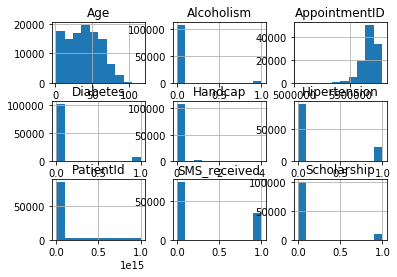

In [15]:
df.hist()

## Univariate Exploration

 start with Patient 



Text(0,0.5,' Patient')

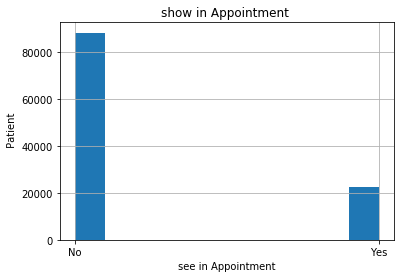

In [16]:
# Patient who's come in Appointment
df.show.hist()
plt.title('show in Appointment ')
plt.xlabel('see in Appointment')
plt.ylabel(' Patient')

must Patient come in Appointment,
### Q: Patient who's come receive message or not ?

In [17]:
# for all Patient are come 
dfT = df[df['show'] == 'No'] # come 
dfF = df[df['show'] == 'Yes']# not come 


In [18]:
# for Patient received message if show or not  
show1 = sum(dfT.SMS_received == 1)
notshow1 = sum(dfF.SMS_received == 1)
print (show1)
print(notshow1)

25698
9784


In [19]:
# for Patient dosen't received message if show or not  
show2 = sum(dfT.SMS_received == 0)
notshow2 = sum(dfF.SMS_received == 0)
print (show2)
print(notshow2)

62510
12535


Text(0,0.5,' Patient')

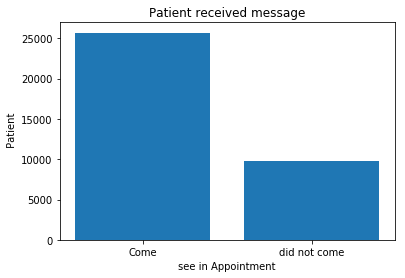

In [20]:
# for Patient received message who's show or not  
plt.bar([1, 2], [show1, notshow1],tick_label=['Come', 'did not come'])
plt.title('Patient received message')
plt.xlabel('see in Appointment')
plt.ylabel(' Patient')

must Patient received message is come 

Text(0,0.5,' Patient')

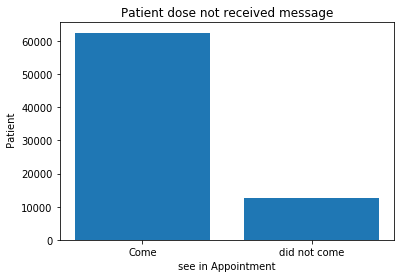

In [21]:
# for Patient dosen't received message who's show or not  
plt.bar([1, 2], [show2, notshow2],tick_label=['Come', 'did not come'])
plt.title('Patient dose not received message')
plt.xlabel('see in Appointment')
plt.ylabel(' Patient')

must Patient dosen't received message is come  

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   inves
# Q2: number of male and female in Scholarship

In [23]:
female = sum(df.Gender =='F')
male = sum(df.Gender =='M')

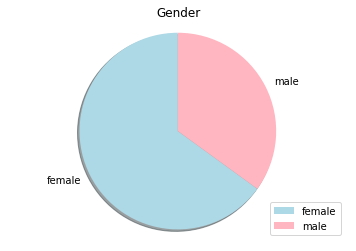

In [24]:
labels = ['female', 'male']
sizes = [female,male]
colors = ['lightblue', 'lightpink']
patches,texts = plt.pie(sizes,labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Gender')
plt.show()

In [25]:
female = (df.Gender =='F')&(df.Scholarship == 1)
male = (df.Gender =='M')&(df.Scholarship == 1)
femaleS = sum(female)
maleS = sum(male)
print (femaleS)
print (maleS)

8853
2008


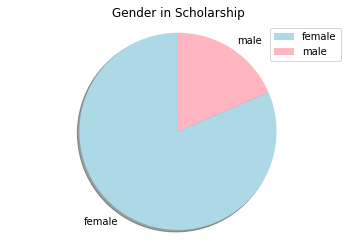

In [26]:
labels = ['female', 'male']
sizes = [femaleS, maleS]
colors = ['lightblue', 'lightpink']
patches,texts = plt.pie(sizes,labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Gender in Scholarship')
plt.show()

female is more then man in Scholarship 

In [27]:
female2 = (df.Gender =='F')&(df.Scholarship == 0)
male2 = (df.Gender =='M')&(df.Scholarship == 0)
femaleS2 = sum(female2)
maleS2 = sum(male2)
print (femaleS2)
print (maleS2)

62987
36679


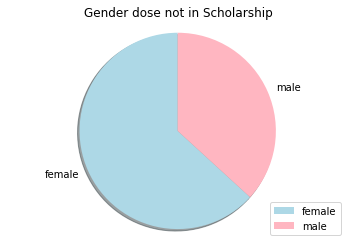

In [28]:
labels = ['female', 'male']
sizes = [femaleS2, maleS2]
colors = ['lightblue', 'lightpink']
patches,texts = plt.pie(sizes,labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Gender dose not in Scholarship')
plt.show()

female is more then man in all database 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


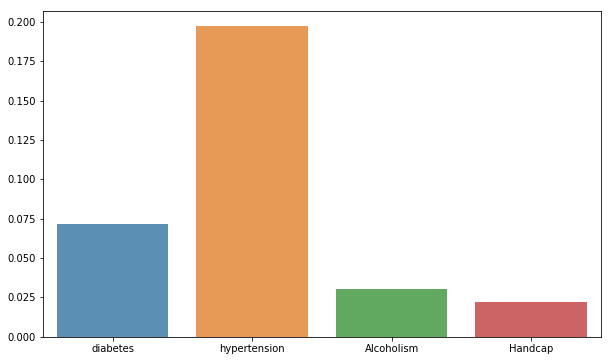

In [30]:
diab = df['Diabetes'].sum()/df['Diabetes'].count()
hype = df['Hipertension'].sum()/df['Hipertension'].count()
alco = df['Alcoholism'].sum()/df['Alcoholism'].count()
hand  = df['Handcap'].sum()/df['Handcap'].count()




x = ['diabetes', 'hypertension','Alcoholism','Handcap']
y =[diab, hype, alco, hand]

plt.subplots(figsize=(10,6))
sns.barplot(x,y, alpha = 0.8);

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


In [31]:
man = df.query('Gender == "M"')
woman = df.query('Gender == "F"')

dia_man = man['Diabetes'].sum()/df['Diabetes'].count()
dia_woman = woman['Diabetes'].sum()/df['Diabetes'].count()

hype_man = man['Hipertension'].sum()/df['Hipertension'].count()
hype_woman = woman['Hipertension'].sum()/df['Hipertension'].count()

alco_man = man['Alcoholism'].sum()/df['Alcoholism'].count()
alco_woman = woman['Alcoholism'].sum()/df['Alcoholism'].count()

hand_man = man['Handcap'].sum()/df['Handcap'].count()
hand_woman = man['Handcap'].sum()/df['Handcap'].count()


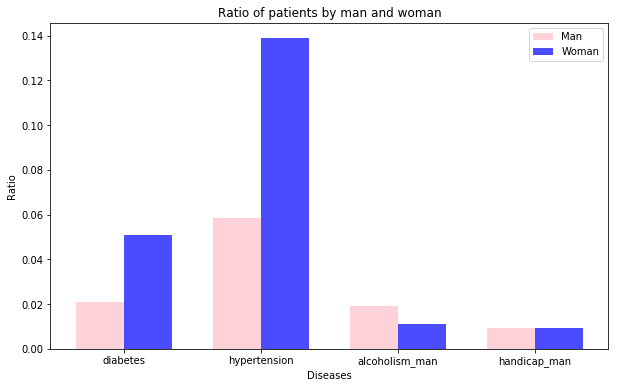

In [32]:
x2 = [dia_man, hype_man, alco_man, hand_man]
y2 = [dia_woman, hype_woman, alco_woman, hand_woman]

ind = np.arange(len(x2))
width = 0.35

plt.figure(figsize=(10,6))
man_chart = plt.bar(ind, x2, width, color='Pink', alpha=.7, label='Man')
woman_chart = plt.bar(ind + width, y2, width, color='Blue', alpha=.7, label='Woman')

# title and labels
plt.ylabel('Ratio')
plt.xlabel('Diseases')
plt.title('Ratio of patients by man and woman')
locations = ind + width / 2  # xtick locations
labels = ['diabetes', 'hypertension', 'alcoholism_man', 'handicap_man']  # xtick labels
plt.xticks(locations, labels)
#plt.subplots(figsize=(20, 10))
#plt.xticks(rotation=90);

# legend
plt.legend();
plt.show()


## Conclusions

1- in this database we have female more then male.
2- average of age is 37 years.
3- sms message is importent, Patient who's received message and not come less then who's not received. 
4-if course we have unclean data. 

## Limitations
1- we have many type of data, cann't work with each other 
2- we have columns dosen't need know about Patient like 'Alcoholism', 'Handcap'.


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0